In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

In [4]:
import os


for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") 
    return img

Image shape: (512, 384, 3)


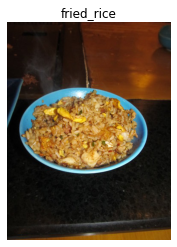

In [8]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [9]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, class_mode='categorical', target_size=(224,224))

test_data = test_datagen.flow_from_directory(test_dir, batch_size=32, class_mode='categorical', target_size=(224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import CategoricalCrossentropy

In [13]:
tf.random.set_seed(42)

model = Sequential()

model.add(Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(10, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(10, 3, activation='relu'))
model.add(Conv2D(10,3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


model.compile(loss=CategoricalCrossentropy(), metrics='accuracy', optimizer='adam')

In [14]:
model_history = model.fit(train_data, validation_data=test_data, epochs=5, steps_per_epoch=len(train_data),
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 228s 966ms/step - loss: 2.1609 - accuracy: 0.2035 - val_loss: 2.0494 - val_accuracy: 0.2724
Epoch 2/5
235/235 [==============================] - 205s 873ms/step - loss: 1.9008 - accuracy: 0.3460 - val_loss: 1.9849 - val_accuracy: 0.3092
Epoch 3/5
235/235 [==============================] - 201s 855ms/step - loss: 1.1269 - accuracy: 0.6367 - val_loss: 2.3159 - val_accuracy: 0.2632
Epoch 4/5
235/235 [==============================] - 195s 831ms/step - loss: 0.1899 - accuracy: 0.9480 - val_loss: 4.0424 - val_accuracy: 0.2356
Epoch 5/5
235/235 [==============================] - 221s 942ms/step - loss: 0.0239 - accuracy: 0.9955 - val_loss: 5.1400 - val_accuracy: 0.2340


In [16]:
def plot_loss_curves(history):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [ ]:
model.evaluate()